In [1]:
import os
import json
import gzip
import pandas as pd
import numpy as np
from urllib.request import urlopen
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('elecfinal2.csv')

C:\Users\shahp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,overall_x,vote,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,polarity,subjectivity,meanratingofuser,usercode,itemcode,avgratingofprod
0,0,0,5.0,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},This is the best novel I have read in 2 or 3 y...,A star is born,937612800,0.231000,0.455333,5.000,227368,1,4.2
1,1,6,3.0,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,0.084286,0.562143,3.000,102800,1,4.2
2,2,7,5.0,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,0.080455,0.549000,4.625,30232,1,4.2
3,3,15,5.0,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,0.362987,0.437987,5.000,59730,1,4.2
4,4,16,3.0,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,0.038676,0.556225,2.000,201882,1,4.2


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.rename(columns={'overall_x':'overall'},inplace=True)

In [6]:
df

,Unnamed: 0.1,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,polarity,subjectivity,meanratingofuser,usercode,itemcode,avgratingofprod
0,0,5.0,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},This is the best novel I have read in 2 or 3 y...,A star is born,937612800,0.231000,0.455333,5.000,227368,1,4.2
1,6,3.0,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,0.084286,0.562143,3.000,102800,1,4.2
2,7,5.0,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,0.080455,0.549000,4.625,30232,1,4.2
3,15,5.0,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,0.362987,0.437987,5.000,59730,1,4.2
4,16,3.0,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,0.038676,0.556225,2.000,201882,1,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499946,499759,3.0,4,True,"02 23, 2007",A1KHI7MA7UYH38,B000H9AF9A,NaN,Bought this all-in-one system from Amazon inst...,"Good Price, Decent Sound",1172188800,0.102410,0.422176,3.000,42124,11933,3.0
499947,499764,3.0,NaN,True,"01 11, 2007",A3LRLP7QEXAJW2,B000H96C3S,NaN,The form factor of the camera is the strongest...,DSC-T10 review,1168473600,0.346667,0.546667,3.000,192115,11928,4.0
499948,499765,5.0,NaN,False,"11 14, 2006",ABVC00A5JVU16,B000H96C3S,NaN,sony is lame. i agree. they'e inexplicably exp...,"ok, i hate sony too. buy this camera anyways.",1163462400,0.069444,0.599339,5.000,229741,11928,4.0
499949,499847,5.0,NaN,False,"08 27, 2011",A2YKJMO5F61YKS,B000HA4EX2,NaN,I needed a sleeve that would easily fit in a b...,"Fits 15.6"" as well!",1314403200,0.185903,0.436667,5.000,144570,11942,5.0


In [ ]:
import nltk
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),stop_words='english',lowercase=True)  
X=vectorizer.fit_transform(df['reviewText'].values)
transformer = TfidfTransformer(smooth_idf=False)
tfidf=transformer.fit_transform(X.toarray().astype(int))

from sklearn.decomposition import PCA

pca = PCA(n_components=100)

principalComponents = pca.fit_transform(tfidf.toarray())

principalDf = pd.DataFrame(data = principalComponents)

C:\Users\shahp\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [8]:
principalDf

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.088879,-0.076289,-0.018755,-0.016154,0.072908,0.074179,0.017954,-0.016824,-0.025323,-0.015664,...,0.018095,0.013843,0.011970,0.042313,-0.028437,0.008950,-0.007101,0.056870,0.026406,0.013916
1,-0.102437,-0.073722,-0.006515,-0.023923,0.069571,0.085367,0.013695,-0.005468,-0.042029,-0.015580,...,0.020668,0.015511,0.000427,0.052079,-0.017161,-0.012128,-0.028681,0.041241,0.031262,0.001254
2,-0.101157,-0.080265,-0.016963,-0.026836,0.102064,0.101472,0.018349,0.004488,-0.058927,-0.009285,...,-0.002907,-0.006331,-0.020076,0.018041,-0.011984,-0.009528,-0.005352,0.014494,-0.007649,0.007213
3,-0.060166,-0.060608,0.073613,0.054902,0.074900,0.007886,0.016509,-0.033137,0.029703,0.009391,...,0.014368,-0.032162,-0.000744,0.028445,-0.018529,-0.003540,0.008352,0.042781,0.015878,0.015066
4,-0.118518,-0.097447,-0.010213,-0.024408,0.110022,0.042969,0.012864,-0.011891,0.003649,0.004234,...,0.008542,-0.048862,-0.032515,0.027413,-0.000135,-0.039181,0.012090,-0.002425,0.019512,0.038295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.116408,0.061513,-0.054354,-0.043527,0.053996,-0.010652,0.000710,-0.037806,0.055095,0.010502,...,-0.016515,-0.038217,-0.003470,-0.006630,0.001533,-0.000909,-0.032734,-0.016681,-0.005255,0.005319
9995,-0.086389,-0.078714,-0.023263,-0.055252,0.073671,0.026907,0.048386,0.001959,-0.010599,-0.001324,...,0.006747,-0.009900,-0.018559,-0.028245,-0.035827,0.020078,-0.019670,0.023746,-0.021819,0.023081
9996,0.113053,-0.021635,0.049636,0.047330,-0.009642,-0.009226,-0.008848,-0.052221,0.044753,-0.013077,...,-0.023598,0.016614,-0.005633,-0.028374,-0.039641,-0.017658,0.003788,-0.000612,-0.043151,0.004266
9997,-0.081340,0.023569,0.005682,-0.001856,0.001012,0.047658,0.025386,-0.012268,-0.050275,-0.043294,...,0.016998,0.002695,-0.019073,-0.014324,-0.015652,-0.019693,-0.022886,0.019420,-0.000943,-0.005528


In [9]:
df.drop(['comp 1','comp 2','comp 3','comp 4'],axis=1,inplace=True)

In [10]:
df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewText', 'summary', 'unixReviewTime', 'polarity',
       'subjectivity', 'meanratingofuser', 'usercode', 'itemcode',
       'avgratingofprod'],
      dtype='object')

In [131]:
df['ratingdeviationg2']=(abs(df['overall']-df['avgratingofprod'])>=2)

In [132]:
df['ratingdeviationg2']=df['ratingdeviationg2'].astype(int)

In [133]:
df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,polarity,subjectivity,meanratingofuser,usercode,itemcode,avgratingofprod,ratingdeviationg2
0,5.0,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},This is the best novel I have read in 2 or 3 y...,A star is born,937612800,0.231000,0.455333,5.000,227368,1,4.2,0
1,3.0,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,0.084286,0.562143,3.000,102800,1,4.2,0
2,5.0,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,0.080455,0.549000,4.625,30232,1,4.2,0
3,5.0,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,0.362987,0.437987,5.000,59730,1,4.2,0
4,3.0,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,0.038676,0.556225,2.000,201882,1,4.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499946,3.0,4,True,"02 23, 2007",A1KHI7MA7UYH38,B000H9AF9A,NaN,Bought this all-in-one system from Amazon inst...,"Good Price, Decent Sound",1172188800,0.102410,0.422176,3.000,42124,11933,3.0,0
499947,3.0,NaN,True,"01 11, 2007",A3LRLP7QEXAJW2,B000H96C3S,NaN,The form factor of the camera is the strongest...,DSC-T10 review,1168473600,0.346667,0.546667,3.000,192115,11928,4.0,0
499948,5.0,NaN,False,"11 14, 2006",ABVC00A5JVU16,B000H96C3S,NaN,sony is lame. i agree. they'e inexplicably exp...,"ok, i hate sony too. buy this camera anyways.",1163462400,0.069444,0.599339,5.000,229741,11928,4.0,0
499949,5.0,NaN,False,"08 27, 2011",A2YKJMO5F61YKS,B000HA4EX2,NaN,I needed a sleeve that would easily fit in a b...,"Fits 15.6"" as well!",1314403200,0.185903,0.436667,5.000,144570,11942,5.0,0


In [134]:
df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewText', 'summary', 'unixReviewTime', 'polarity',
       'subjectivity', 'meanratingofuser', 'usercode', 'itemcode',
       'avgratingofprod', 'ratingdeviationg2'],
      dtype='object')

In [26]:
df1=df[['overall','verified','lengthofreview','reviewTextpolarity','reviewTextsubjectivity','noofreviewsday','ratingdeviationg2']]

In [171]:
df1=pd.concat([df1,principalDf],axis=1)

In [18]:
df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewText', 'summary', 'unixReviewTime', 'polarity',
       'subjectivity', 'meanratingofuser', 'usercode', 'itemcode',
       'avgratingofprod', 'ratingdeviationg2'],
      dtype='object')

In [154]:
centre0=pd.DataFrame(np.array([[6,0,3,6,0,1,1]]))

In [155]:
centre1=pd.DataFrame(np.array([[0,0,3,-4,4,1,1]]))

In [156]:
centre2=pd.DataFrame(np.array([[4,1,3,0,2,0,-3]]))

In [157]:
centre1

,0,1,2,3,4,5,6
0,0,0,3,-4,4,1,1


In [158]:
centre0

,0,1,2,3,4,5,6
0,6,0,3,6,0,1,1


In [159]:
mean=principalDf.mean(axis=0).values

In [160]:
means=pd.DataFrame(mean)

In [161]:
means=means.transpose()

In [162]:
centre0=pd.concat([centre0,means],axis=1)

In [163]:
centre1=pd.concat([centre1,means],axis=1)

In [164]:
centre2=pd.concat([centre2,means],axis=1)

In [165]:
centre1

,0,1,2,3,4,5,6,0,1,2,...,90,91,92,93,94,95,96,97,98,99
0,0,0,3,-4,4,1,1,-2.074642e-17,-1.281116e-16,-9.460601e-17,...,4.635645e-18,-8.122094e-18,5.947227e-19,1.061132e-17,7.735212e-18,-4.566249e-18,-2.256407e-18,7.517309e-18,4.203308e-18,1.766472e-18


In [166]:
centre=pd.concat([centre0,centre1,centre2],axis=0)

In [167]:
centre

,0,1,2,3,4,5,6,0,1,2,...,90,91,92,93,94,95,96,97,98,99
0,6,0,3,6,0,1,1,-2.074642e-17,-1.281116e-16,-9.460601e-17,...,4.635645e-18,-8.122094e-18,5.947227e-19,1.061132e-17,7.735212e-18,-4.566249e-18,-2.256407e-18,7.517309e-18,4.203308e-18,1.766472e-18
0,0,0,3,-4,4,1,1,-2.074642e-17,-1.281116e-16,-9.460601e-17,...,4.635645e-18,-8.122094e-18,5.947227e-19,1.061132e-17,7.735212e-18,-4.566249e-18,-2.256407e-18,7.517309e-18,4.203308e-18,1.766472e-18
0,4,1,3,0,2,0,-3,-2.074642e-17,-1.281116e-16,-9.460601e-17,...,4.635645e-18,-8.122094e-18,5.947227e-19,1.061132e-17,7.735212e-18,-4.566249e-18,-2.256407e-18,7.517309e-18,4.203308e-18,1.766472e-18


In [168]:
df1.drop('labels',axis=1,inplace=True)

c:\users\shahp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   overall                 9999 non-null   float64
 1   verified                9999 non-null   float64
 2   lengthofreview          9999 non-null   int64  
 3   reviewTextpolarity      9999 non-null   int64  
 4   reviewTextsubjectivity  9999 non-null   int64  
 5   noofreviewsday          9999 non-null   float64
 6   ratingdeviationg2       9999 non-null   int32  
dtypes: float64(3), int32(1), int64(3)
memory usage: 905.9 KB


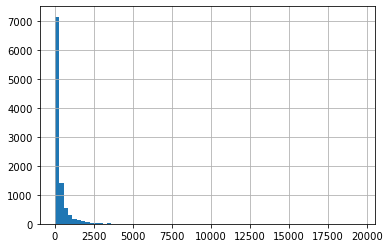

In [33]:
df1['lengthofreview'].hist(bins=70)

In [34]:
def discrete_length(x):
    length=x
    if(length<200):
        return 0
    if(length<500):
        return 1
    if(length<750):
        return 2
    if(length<1250):
        return 3
    if(length<2500):
        return 4
    else:
        return 5

df1['lengthofreview']=df['lengthofreview'].apply(lambda x: discrete_length(x))

<ipython-input-34-21ee8ff12d2a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['lengthofreview']=df['lengthofreview'].apply(lambda x: discrete_length(x))


In [135]:
def discrete_polarity(x):
    length=x
    if(length<(-0.75)):
        return (-4)
    if(length<(-0.5)):
        return (-3)
    if(length<(-0.25)):
        return (-2)
    if(length<0):
        return (-1)
    if(length<0.25):
        return 0
    if(length<0.5):
        return 1
    if(length<0.75):
        return 2
    if(length<=1):
        return 3
    

df['reviewTextpolarity']=df['polarity'].apply(lambda x: discrete_polarity(x))

In [136]:
def discrete_sub(x):
    length=x
    if(length<0.2):
        return 0
    if(length<0.4):
        return 1
    if(length<0.6):
        return 2
    if(length<0.8):
        return 3
    if(length<=1):
        return 4

df['reviewTextsubjectivity']=df['subjectivity'].apply(lambda x: discrete_sub(x))

In [137]:
df.verified=df.verified.astype(int)

In [138]:
df.drop(['reviewerID','asin','style','reviewText','summary','unixReviewTime','meanratingofuser','usercode','itemcode','avgratingofprod','polarity','subjectivity'],axis=1,inplace=True)

In [139]:
df.drop(['reviewTime'],axis=1,inplace=True)

In [140]:
df.drop(['vote'],axis=1,inplace=True)

In [141]:
df.isnull().sum()

overall                   0
verified                  0
ratingdeviationg2         0
reviewTextpolarity        0
reviewTextsubjectivity    0
dtype: int64

In [142]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,max_iter=1,algorithm='full').fit(df.values)
labels=kmeans.labels_

In [152]:
df['labels']=labels

In [47]:
kmeans.cluster_centers_

array([[ 4.82370346e+00,  9.18061777e-01,  3.76387369e-03,
         1.97813926e+00,  3.10342740e+00],
       [ 4.74701087e+00,  8.39798322e-01,  4.48833701e-03,
         1.95086609e-01,  1.72368489e+00],
       [ 2.03606692e+00,  7.55264389e-01,  4.65910154e-01,
        -1.14096865e-01,  1.86317267e+00]])

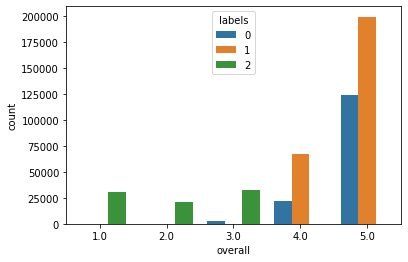

In [42]:
sns.countplot('overall',hue='labels',data=df)

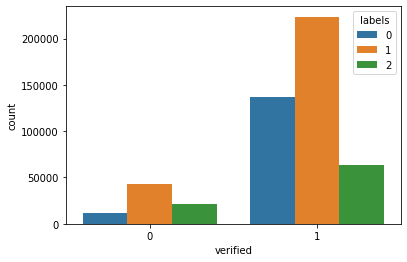

In [46]:
sns.countplot('verified',hue='labels',data=df)

In [182]:
df1[df1['noofreviewsday']<0.4]

,overall,verified,lengthofreview,reviewTextpolarity,reviewTextsubjectivity,noofreviewsday,ratingdeviationg2,0,1,2,...,91,92,93,94,95,96,97,98,99,labels
0,5.0,1.0,3,0,2,0.333333,0,-0.088879,-0.076289,-0.018755,...,0.013843,0.011970,0.042313,-0.028437,0.008950,-0.007101,0.056870,0.026406,0.013916,2
1,3.0,1.0,1,0,2,0.333333,0,-0.102437,-0.073722,-0.006515,...,0.015511,0.000427,0.052079,-0.017161,-0.012128,-0.028681,0.041241,0.031262,0.001254,2
2,5.0,0.0,4,0,2,0.333333,0,-0.101157,-0.080265,-0.016963,...,-0.006331,-0.020076,0.018041,-0.011984,-0.009528,-0.005352,0.014494,-0.007649,0.007213,2
3,5.0,0.0,3,1,2,0.333333,0,-0.060166,-0.060608,0.073613,...,-0.032162,-0.000744,0.028445,-0.018529,-0.003540,0.008352,0.042781,0.015878,0.015066,2
4,3.0,1.0,4,0,2,0.333333,0,-0.118518,-0.097447,-0.010213,...,-0.048862,-0.032515,0.027413,-0.000135,-0.039181,0.012090,-0.002425,0.019512,0.038295,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,5.0,1.0,0,1,1,0.333333,0,-0.116408,0.061513,-0.054354,...,-0.038217,-0.003470,-0.006630,0.001533,-0.000909,-0.032734,-0.016681,-0.005255,0.005319,2
9995,5.0,1.0,4,0,2,0.333333,0,-0.086389,-0.078714,-0.023263,...,-0.009900,-0.018559,-0.028245,-0.035827,0.020078,-0.019670,0.023746,-0.021819,0.023081,2
9996,5.0,1.0,0,1,2,0.333333,0,0.113053,-0.021635,0.049636,...,0.016614,-0.005633,-0.028374,-0.039641,-0.017658,0.003788,-0.000612,-0.043151,0.004266,2
9997,5.0,1.0,1,0,4,0.333333,0,-0.081340,0.023569,0.005682,...,0.002695,-0.019073,-0.014324,-0.015652,-0.019693,-0.022886,0.019420,-0.000943,-0.005528,2


In [61]:
df.columns

Index(['overall', 'verified', 'ratingdeviationg2', 'reviewTextpolarity',
       'reviewTextsubjectivity', 'labels'],
      dtype='object')

In [181]:
print(kmeans.cluster_centers_)

[[ 5.00000000e+00  5.67567568e-01  6.75675676e-02  3.00000000e+00
   2.24324324e+00  3.37837838e-01  1.48648649e-01  9.65746799e-04
   2.34644207e-02 -8.99669498e-03  3.32482857e-03 -2.77861734e-02
  -5.20067900e-03 -1.13032190e-02 -2.20447860e-02 -2.54738606e-03
  -1.18341266e-02 -9.44427826e-04  2.72600164e-03 -4.42069551e-03
   4.90952870e-03  9.78917796e-04  6.82465653e-03  1.27114713e-02
   1.18168927e-03 -8.31442539e-03 -2.09363865e-03  1.76900983e-03
   1.54819210e-03 -7.87406335e-03 -1.85060492e-03 -5.11367370e-03
  -7.89103352e-03 -5.63261605e-03 -1.31302675e-02  7.56668960e-03
   3.62336555e-04  4.29208319e-03 -7.46043497e-03  2.97250321e-04
   2.62661436e-03 -1.29833378e-02  4.16045239e-03  4.93547193e-03
   4.01036360e-03 -6.63468594e-03  2.32599512e-03  4.70681180e-04
   3.86787230e-03 -8.21718227e-04  2.36682051e-03  9.10694735e-03
  -6.13442362e-03 -9.07966103e-04 -6.90464972e-03 -9.02857308e-03
  -6.41576206e-04  3.29440573e-03 -5.28207651e-03  3.50318169e-03
   3.54267

In [183]:
df1['labels'].loc[(df1['overall']==3)]=2

c:\users\shahp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


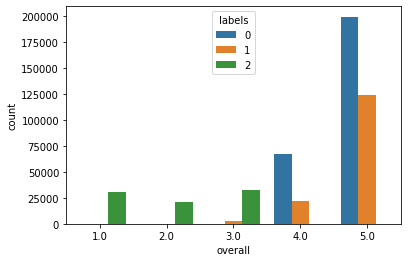

In [144]:
sns.countplot('overall',hue='labels',data=df)

In [153]:
df['labels'].loc[(df['labels']==1)]=0

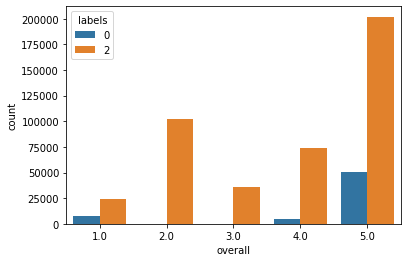

In [181]:
sns.countplot('overall',hue='labels',data=df)

In [155]:
df['labels'].loc[((df['overall']==3))]=2

In [157]:
df['labels'].loc[((df['overall']==2) | (df['overall']==4)) & (df['verified']==1)]=2

In [160]:
df['labels'].loc[((df['overall']==1) & (df['verified']==0) & (df['ratingdeviationg2']==1))]=0

In [163]:
df['labels'].loc[((df['overall']==5) & (df['verified']==1) & (df['ratingdeviationg2']==0) & (df['reviewTextpolarity']<(2)))]=2

In [170]:
df.loc[(df['overall']==5) & (df['labels']==0)  & (df['reviewTextpolarity']<2)]=2

In [175]:
df.loc[(df['overall']==5) & (df['labels']==0)  & (df['reviewTextpolarity']==3) & (df['ratingdeviationg2']==0) & (df['verified']==1)]=2

In [180]:
df.loc[(df['overall']==4) & (df['labels']==0)  & (df['reviewTextpolarity']<1)]=2

In [182]:
df.loc[df['labels']==0]

,overall,verified,ratingdeviationg2,reviewTextpolarity,reviewTextsubjectivity,labels
9,5.0,0,0,2,3,0
12,1.0,0,1,0,2,0
13,1.0,0,1,0,2,0
37,5.0,1,0,2,2,0
51,5.0,1,0,2,2,0
...,...,...,...,...,...,...
499894,5.0,1,0,2,3,0
499900,5.0,1,0,2,3,0
499917,5.0,1,0,2,1,0
499934,5.0,1,0,2,3,0


In [183]:
df['labels']

0         2
1         2
2         2
3         2
4         2
         ..
499946    2
499947    2
499948    2
499949    2
499950    2
Name: labels, Length: 499951, dtype: int32

In [184]:
df1=pd.read_csv('elecfinal2.csv')

C:\Users\shahp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [186]:
df1['fake']=df['labels']

In [189]:
df1.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [190]:
df1

,overall_x,vote,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,polarity,subjectivity,meanratingofuser,usercode,itemcode,avgratingofprod,fake
0,5.0,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},This is the best novel I have read in 2 or 3 y...,A star is born,937612800,0.231000,0.455333,5.000,227368,1,4.2,2
1,3.0,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,0.084286,0.562143,3.000,102800,1,4.2,2
2,5.0,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,0.080455,0.549000,4.625,30232,1,4.2,2
3,5.0,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,0.362987,0.437987,5.000,59730,1,4.2,2
4,3.0,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,0.038676,0.556225,2.000,201882,1,4.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499946,3.0,4,True,"02 23, 2007",A1KHI7MA7UYH38,B000H9AF9A,NaN,Bought this all-in-one system from Amazon inst...,"Good Price, Decent Sound",1172188800,0.102410,0.422176,3.000,42124,11933,3.0,2
499947,3.0,NaN,True,"01 11, 2007",A3LRLP7QEXAJW2,B000H96C3S,NaN,The form factor of the camera is the strongest...,DSC-T10 review,1168473600,0.346667,0.546667,3.000,192115,11928,4.0,2
499948,5.0,NaN,False,"11 14, 2006",ABVC00A5JVU16,B000H96C3S,NaN,sony is lame. i agree. they'e inexplicably exp...,"ok, i hate sony too. buy this camera anyways.",1163462400,0.069444,0.599339,5.000,229741,11928,4.0,2
499949,5.0,NaN,False,"08 27, 2011",A2YKJMO5F61YKS,B000HA4EX2,NaN,I needed a sleeve that would easily fit in a b...,"Fits 15.6"" as well!",1314403200,0.185903,0.436667,5.000,144570,11942,5.0,2


In [191]:
df1.to_csv('elecfinal3.csv')

In [192]:
df=pd.read_csv('elecfinal3.csv')

C:\Users\shahp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [197]:
df.loc[df['fake']==2]['overall_x'].mean()

4.282498113034926